In [1]:
from pathlib import Path
import pandas as pd

In [2]:
filepath = "/home/viktor/Documents/kaggle/kaggle_llm/data/data_dumps/more_questions/more_questions_raw_questions_wiki_sci_1.csv"
file_name = filepath.split("/")[-1].split(".")[0]
print(file_name)
csv = pd.read_csv(filepath, index_col=0)
csv.head()

more_questions_raw_questions_wiki_sci_1


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,What is the significance of HD 7924 b?,It is the first planet discovered in the const...,It is a super-Earth exoplanet with a minimum m...,It takes only about 129.5 hours to orbit the star,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,B,0,0
1,2,What is the significance of HD 69830 b?,It is a gas giant exoplanet.,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,B,0,1
2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,HD 69830 b is 10 times more massive than Earth...,HD 69830 b orbits very close to its parent sta...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b models predict that tidal heating w...,D,0,1
3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It is a rocky planet.,It orbits very close to its parent star.,D,0,1
4,5,What is the role of tidal heating in HD 69830 b?,Tidal heating causes the high heat flux at the...,Tidal heating contributes to the 82/3 day orbi...,Tidal heating determines the rocky composition...,Tidal heating is responsible for the 10 times ...,Tidal heating allows HD 69830 b to orbit very ...,A,0,1


In [3]:
# context_prompt = "You are a GOD-like AGI that is a top level expert in all of the scientific fields in the world. " \
#     + f"Your task is to answer to the question below with as much accuracy as possible. " \
#     + f"Think step by step and explain your reasoning before you choose whether this answer is correct. "


# csv['prompt'] = context_prompt + csv['prompt']
# csv.head()


In [4]:
# replace NaN with "None"
csv = csv.fillna("None")

In [5]:
# "Which rows have 'What are the vascular bundles found in' in column 'prompt'?
csv[csv["prompt"].str.contains("What are the vascular bundles found in")]


,id,prompt,A,B,C,D,E,answer,cluster number,round
1128,1129,What are the vascular bundles found in the pet...,Single,Double,Multiple,Triple,None,A,294,1


In [6]:
len(csv)

5227

['B' 'D' 'A' 'C' 'E' 'A5III']


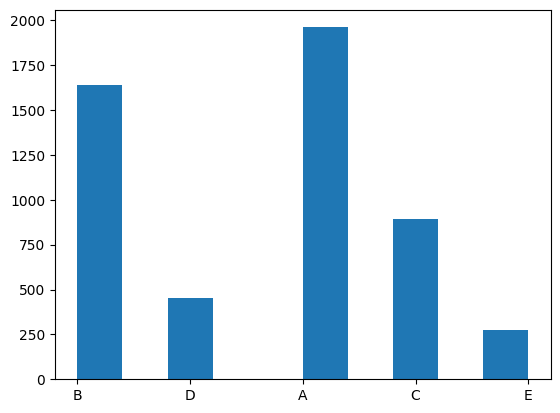

In [7]:
import matplotlib.pyplot as plt

print(csv['answer'].unique())

# remove A5III from answer
csv = csv[csv['answer'] != 'A5III']


plt.hist(csv['answer'].values);

In [8]:
import pandas as pd
import numpy as np

def shuffle_answers(df):
    # Shuffle answers
    answers = ['A', 'B', 'C', 'D', 'E']

    for idx, row in df.iterrows():
        current_answer = row['answer']
        
        # Choose a new answer that's different from the current answer
        new_answer = np.random.choice([ans for ans in answers if ans != current_answer])
        
        # Swap the text from the current answer to the new answer and vice-versa
        df.at[idx, current_answer], df.at[idx, new_answer] = df.at[idx, new_answer], df.at[idx, current_answer]
        
        # Update the answer column with the new answer
        df.at[idx, 'answer'] = new_answer


    return df

In [9]:
# Sample DataFrame
data = {
    'id': [1, 2, 3, 4, 5],
    'prompt': ['q1', 'q2', 'q3', 'q4', 'q5'],
    'A': ['text1', 'text2', 'text3', 'text4', 'text5'],
    'B': ['text6', 'text7', 'text8', 'text9', 'text10'],
    'C': ['text11', 'text12', 'text13', 'text14', 'text15'],
    'D': ['text16', 'text17', 'text18', 'text19', 'text20'],
    'E': ['text21', 'text22', 'text23', 'text24', 'text25'],
    'answer': ['A', 'B', 'B', 'A', 'C'],
    'cluster number': [1, 2, 1, 3, 2],
    'round': [1, 1, 2, 2, 3]
}

df = pd.DataFrame(data)
df

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text1,text6,text11,text16,text21,A,1,1
1,2,q2,text2,text7,text12,text17,text22,B,2,1
2,3,q3,text3,text8,text13,text18,text23,B,1,2
3,4,q4,text4,text9,text14,text19,text24,A,3,2
4,5,q5,text5,text10,text15,text20,text25,C,2,3


In [10]:

df = shuffle_answers(df)
df


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text16,text6,text11,text1,text21,D,1,1
1,2,q2,text2,text17,text12,text7,text22,D,2,1
2,3,q3,text3,text18,text13,text8,text23,D,1,2
3,4,q4,text19,text9,text14,text4,text24,D,3,2
4,5,q5,text5,text15,text10,text20,text25,B,2,3


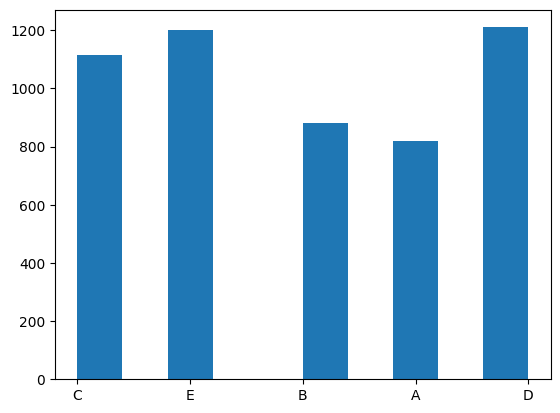

In [11]:
csv = shuffle_answers(csv)

plt.hist(csv['answer'].values);

In [12]:
n = 200
train_csv = csv.head(-n).reset_index(drop=True)
test_csv = csv.tail(n).reset_index(drop=True)

In [13]:
train_csv.tail()

,id,prompt,A,B,C,D,E,answer,cluster number,round
5021,5023,What is the purpose of a pneumatic trough?,To collect solids in a laboratory,To generate gas by displacing water,To measure the volume of liquids,To support gas bottles or bulbs,"To hold gases such as hydrogen, oxygen, and ni...",E,964,2
5022,5024,What is the purpose of pressure swing adsorpti...,To increase the pressure of a gas mixture,To purify water,To decrease the pressure of a gas mixture,To generate nitrogen gas,To separate gas species from a mixture,E,964,3
5023,5025,What is the significance of eccentric reducers...,To increase the flow rate of the fluid,To decrease the pressure of the fluid,To create a parallel edge between the two conn...,To ensure symmetrical flow conditions in the pipe,To prevent the accumulation of vapor in the pipe,E,964,4
5024,5026,What is the function of the vertex pipeline in...,To calculate the 2D data points in a scene,To perform texturing and fragment shading,To create geometry data for display on a compu...,To eliminate unneeded data from going through ...,To program the vertex processing under the Dir...,C,965,0
5025,5027,What is the purpose of view volume clipping an...,To calculate the 2D data points in a scene,To create geometry data for display on a compu...,To perform texturing and fragment shading,To remove extraneous work and improve renderin...,To eliminate unneeded data from going through ...,D,965,0


In [14]:
test_csv.head()

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,5028,What are some capabilities of the vertex proce...,Higher-order primitives,Geometry blending,Displacement mapping,Point sprites,Matrix stacks,C,965,0
1,5029,What is the significance of the Volari V5?,It was the first video card to use an AGP 8x i...,It was the first video card to support DirectX 9.,It introduced XGI Technology Inc as a new play...,It had a clock speed similar to the Radeon 960...,It provided superior performance compared to o...,D,965,1
2,5030,What is the purpose of the Radeon HD 8000 series?,To introduce AMD's shift from VLIW to RISC/SIM...,To improve the Graphics Core Next architecture,To accelerate video decoding and encoding,To support multi-monitor display,To provide support for OpenCL and Vulkan APIs,D,965,2
3,5031,What is the significance of the R200 GPU used ...,It introduced the first implementation of a ha...,It featured advanced memory bandwidth saving a...,"It included 2D GUI acceleration, video acceler...",It achieved higher performance and improved fe...,It improved the texture filtering capabilities...,D,965,3
4,5032,What is the significance of Mali-400 MP?,It is the most powerful GPU across multiple pl...,It is the first GPU to offer 2D and 3D acceler...,It is the first GPU to offer multi-core implem...,It is the first GPU to support OpenGL ES 2.0.,It is the first GPU to support resolutions up ...,C,965,4


In [15]:
test_csv.index = list(range(len(test_csv)))
test_csv.index.name = "id"
test_csv.head()

,id,prompt,A,B,C,D,E,answer,cluster number,round
id,,,,,,,,,,
0,5028,What are some capabilities of the vertex proce...,Higher-order primitives,Geometry blending,Displacement mapping,Point sprites,Matrix stacks,C,965,0
1,5029,What is the significance of the Volari V5?,It was the first video card to use an AGP 8x i...,It was the first video card to support DirectX 9.,It introduced XGI Technology Inc as a new play...,It had a clock speed similar to the Radeon 960...,It provided superior performance compared to o...,D,965,1
2,5030,What is the purpose of the Radeon HD 8000 series?,To introduce AMD's shift from VLIW to RISC/SIM...,To improve the Graphics Core Next architecture,To accelerate video decoding and encoding,To support multi-monitor display,To provide support for OpenCL and Vulkan APIs,D,965,2
3,5031,What is the significance of the R200 GPU used ...,It introduced the first implementation of a ha...,It featured advanced memory bandwidth saving a...,"It included 2D GUI acceleration, video acceler...",It achieved higher performance and improved fe...,It improved the texture filtering capabilities...,D,965,3
4,5032,What is the significance of Mali-400 MP?,It is the most powerful GPU across multiple pl...,It is the first GPU to offer 2D and 3D acceler...,It is the first GPU to offer multi-core implem...,It is the first GPU to support OpenGL ES 2.0.,It is the first GPU to support resolutions up ...,C,965,4


In [16]:
out_dir = Path("../data/raw_questions_wiki_sci_1-splitted/")
out_dir.mkdir(exist_ok=True, parents=True)

train_csv.to_csv(out_dir / f"{file_name}_train.csv")
test_csv.to_csv(out_dir / f"{file_name}_test.csv")

In [17]:
df = pd.read_csv("/home/viktor/Documents/kaggle/kaggle_llm/data/kaggle-llm-science-exam-splitted/more_questions_raw_questions_wiki_sci_1_train.csv")
df

,Unnamed: 0,id,prompt,A,B,C,D,E,answer,cluster number,round
0,0,1,What is the significance of HD 7924 b?,It is the first planet discovered in the const...,It is a super-Earth exoplanet with a minimum m...,It takes only about 129.5 hours to orbit the star,It is located approximately 55 light years away,It is a gaseous planet with unknown mass,B,0,0
1,1,2,What is the significance of HD 69830 b?,It orbits very close to its parent star.,It is a gas giant exoplanet.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It takes 82/3 days to complete an orbit.,E,0,1
2,2,3,What is the difference between HD 69830 b and ...,HD 69830 b takes 82/3 days to complete an orbi...,HD 69830 b is 10 times more massive than Earth...,"HD 69830 b is a rocky planet, while a gas gian...",HD 69830 b models predict that tidal heating w...,HD 69830 b orbits very close to its parent sta...,C,0,1
3,3,4,What is the reason for HD 69830 b not being a ...,It takes 82/3 days to complete an orbit.,It is a rocky planet.,It is 10 times more massive than Earth.,Models predict that tidal heating would produc...,It orbits very close to its parent star.,B,0,1
4,4,5,What is the role of tidal heating in HD 69830 b?,Tidal heating contributes to the 82/3 day orbi...,Tidal heating determines the rocky composition...,Tidal heating causes the high heat flux at the...,Tidal heating is responsible for the 10 times ...,Tidal heating allows HD 69830 b to orbit very ...,C,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5021,5021,5023,What is the purpose of a pneumatic trough?,To collect solids in a laboratory,"To hold gases such as hydrogen, oxygen, and ni...",To measure the volume of liquids,To support gas bottles or bulbs,To generate gas by displacing water,B,964,2
5022,5022,5024,What is the purpose of pressure swing adsorpti...,To increase the pressure of a gas mixture,To purify water,To decrease the pressure of a gas mixture,To separate gas species from a mixture,To generate nitrogen gas,D,964,3
5023,5023,5025,What is the significance of eccentric reducers...,To prevent the accumulation of vapor in the pipe,To decrease the pressure of the fluid,To create a parallel edge between the two conn...,To ensure symmetrical flow conditions in the pipe,To increase the flow rate of the fluid,A,964,4
5024,5024,5026,What is the function of the vertex pipeline in...,To calculate the 2D data points in a scene,To create geometry data for display on a compu...,To perform texturing and fragment shading,To eliminate unneeded data from going through ...,To program the vertex processing under the Dir...,B,965,0
